# Logistic Regression Model

Logistic regression is a widely used model in machine learning for binary classification tasks. It models the probability that a given input belongs to a particular class. The logistic regression model function is represented as:

$$ f_{\mathbf{w},b}(\mathbf{x}) = g(\mathbf{w} \cdot \mathbf{x} + b) $$

In this equation, $f_{\mathbf{w},b}(\mathbf{x})$ represents the predicted probability, $\mathbf{w}$ is the weight vector, $\mathbf{b}$ is the bias term, $\mathbf{x}$ is the input feature vector, and $g(z)$ is the sigmoid function:

$$ g(z) = \frac{1}{1 + e^{-z}} $$

## Model Training

To train a logistic regression model, we aim to find the best values for the parameters $(\mathbf{w}, b)$ that best fit our dataset and provide accurate class probabilities.

### Forward Pass

The forward pass computes the linear combination of input features $\mathbf{x}$ with the weight vector $\mathbf{w}$ and the bias term $b$ and then applies the sigmoid function to the result:

$$ Z = \mathbf{x} \cdot \mathbf{w} + b $$
$$ A = \sigma(Z) $$

### Cost Function

The cost function measures the error between the predicted probabilities and the true labels. In logistic regression, we use the binary cross-entropy loss function:

$$ J(\mathbf{w},b) = -\frac{1}{m} \sum_{i=0}^{m-1} \left[y_i \log\left(f_{\mathbf{w},b}(\mathbf{x}_i)\right) + (1 - y_i) \log\left(1 - f_{\mathbf{w},b}(\mathbf{x}_i)\right)\right] $$

Here, $m$ is the number of samples, $y_i$ is the true label of sample $i$, and $f_{\mathbf{w},b}(\mathbf{x}_i)$ is the predicted probability of sample $i$ belonging to the positive class.

### Backward Pass (Gradient Computation)

The backward pass calculates the gradients of the cost function with respect to the parameters $(\mathbf{w}, b)$. These gradients are essential for updating the model parameters during training:

$$ \frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} \left(f_{\mathbf{w},b}(\mathbf{x}_i) - y_i\right) $$

$$ \frac{\partial J(\mathbf{w},b)}{\partial \mathbf{w}} = \frac{1}{m} \sum_{i=0}^{m-1} \left(f_{\mathbf{w},b}(\mathbf{x}_i) - y_i\right)\mathbf{x}_i $$

## Training Process

The training process involves iteratively updating the weight vector $\mathbf{w}$ and bias term $b$ to minimize the cost function. This is typically done through an optimization algorithm like gradient descent. The update equations for parameters are:

$$ \mathbf{w} \leftarrow \mathbf{w} - \alpha \frac{\partial J}{\partial \mathbf{w}} $$

$$ b \leftarrow b - \alpha \frac{\partial J}{\partial b} $$

Here, $\alpha$ represents the learning rate, which controls the step size during parameter updates.

By iteratively performing the forward pass, computing the cost, performing the backward pass, and updating the parameters, the logistic regression model learns to make better predictions and fit the data.


**Visualize the shape of the  Logistic function**

In [3]:
import numpy as np
import plotly.express as px

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-12, 12, 200)
fig = px.line(x=z, y=sigmoid(z),title='Logistic Function',template="plotly_dark")

fig.show()

In [4]:
import pandas as pd
from pathlib import Path
import sys
df = pd.read_csv("../data/breast-cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
fig = px.histogram(
    df,
    x='diagnosis',
    color='diagnosis', 
    template="plotly_dark"
)
fig.show()

In [34]:
fig = px.histogram(
    df,
    x='area_mean',
    color='diagnosis',
    template = 'plotly_dark')
fig.show()

In [35]:
fig = px.histogram(
    df,
    x='radius_mean',
    color='diagnosis',
    template = 'plotly_dark')
fig.show()

In [36]:
fig = px.histogram(
    df,
    x='perimeter_mean',
    color='diagnosis',
    template = 'plotly_dark')
fig.show()

In [37]:
fig = px.histogram(
    df,
    x='smoothness_mean',
    color='diagnosis',
    template = 'plotly_dark')
fig.show()

In [ ]:
fig = px.histogram(
    df,
    x='texture_mean',
    color='diagnosis',
    template = 'plotly_dark')
fig.show()

In [38]:
fig = px.scatter(
    df,
    x='symmetry_worst',
    color='diagnosis',
    template = 'plotly_dark')
fig.show()

In [39]:
fig = px.scatter(
    df,
    x='concavity_worst',
    color='diagnosis',
    template = 'plotly_dark')
fig.show()

In [ ]:
fig = px.scatter(
    df,
    x='fractal_dimension_worst',
    color='diagnosis',
    template = 'plotly_dark')
fig.show()

<a id="4"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '

# Data Preprocessing

In [6]:
df.drop('id', axis=1, inplace=True)

In [8]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) 

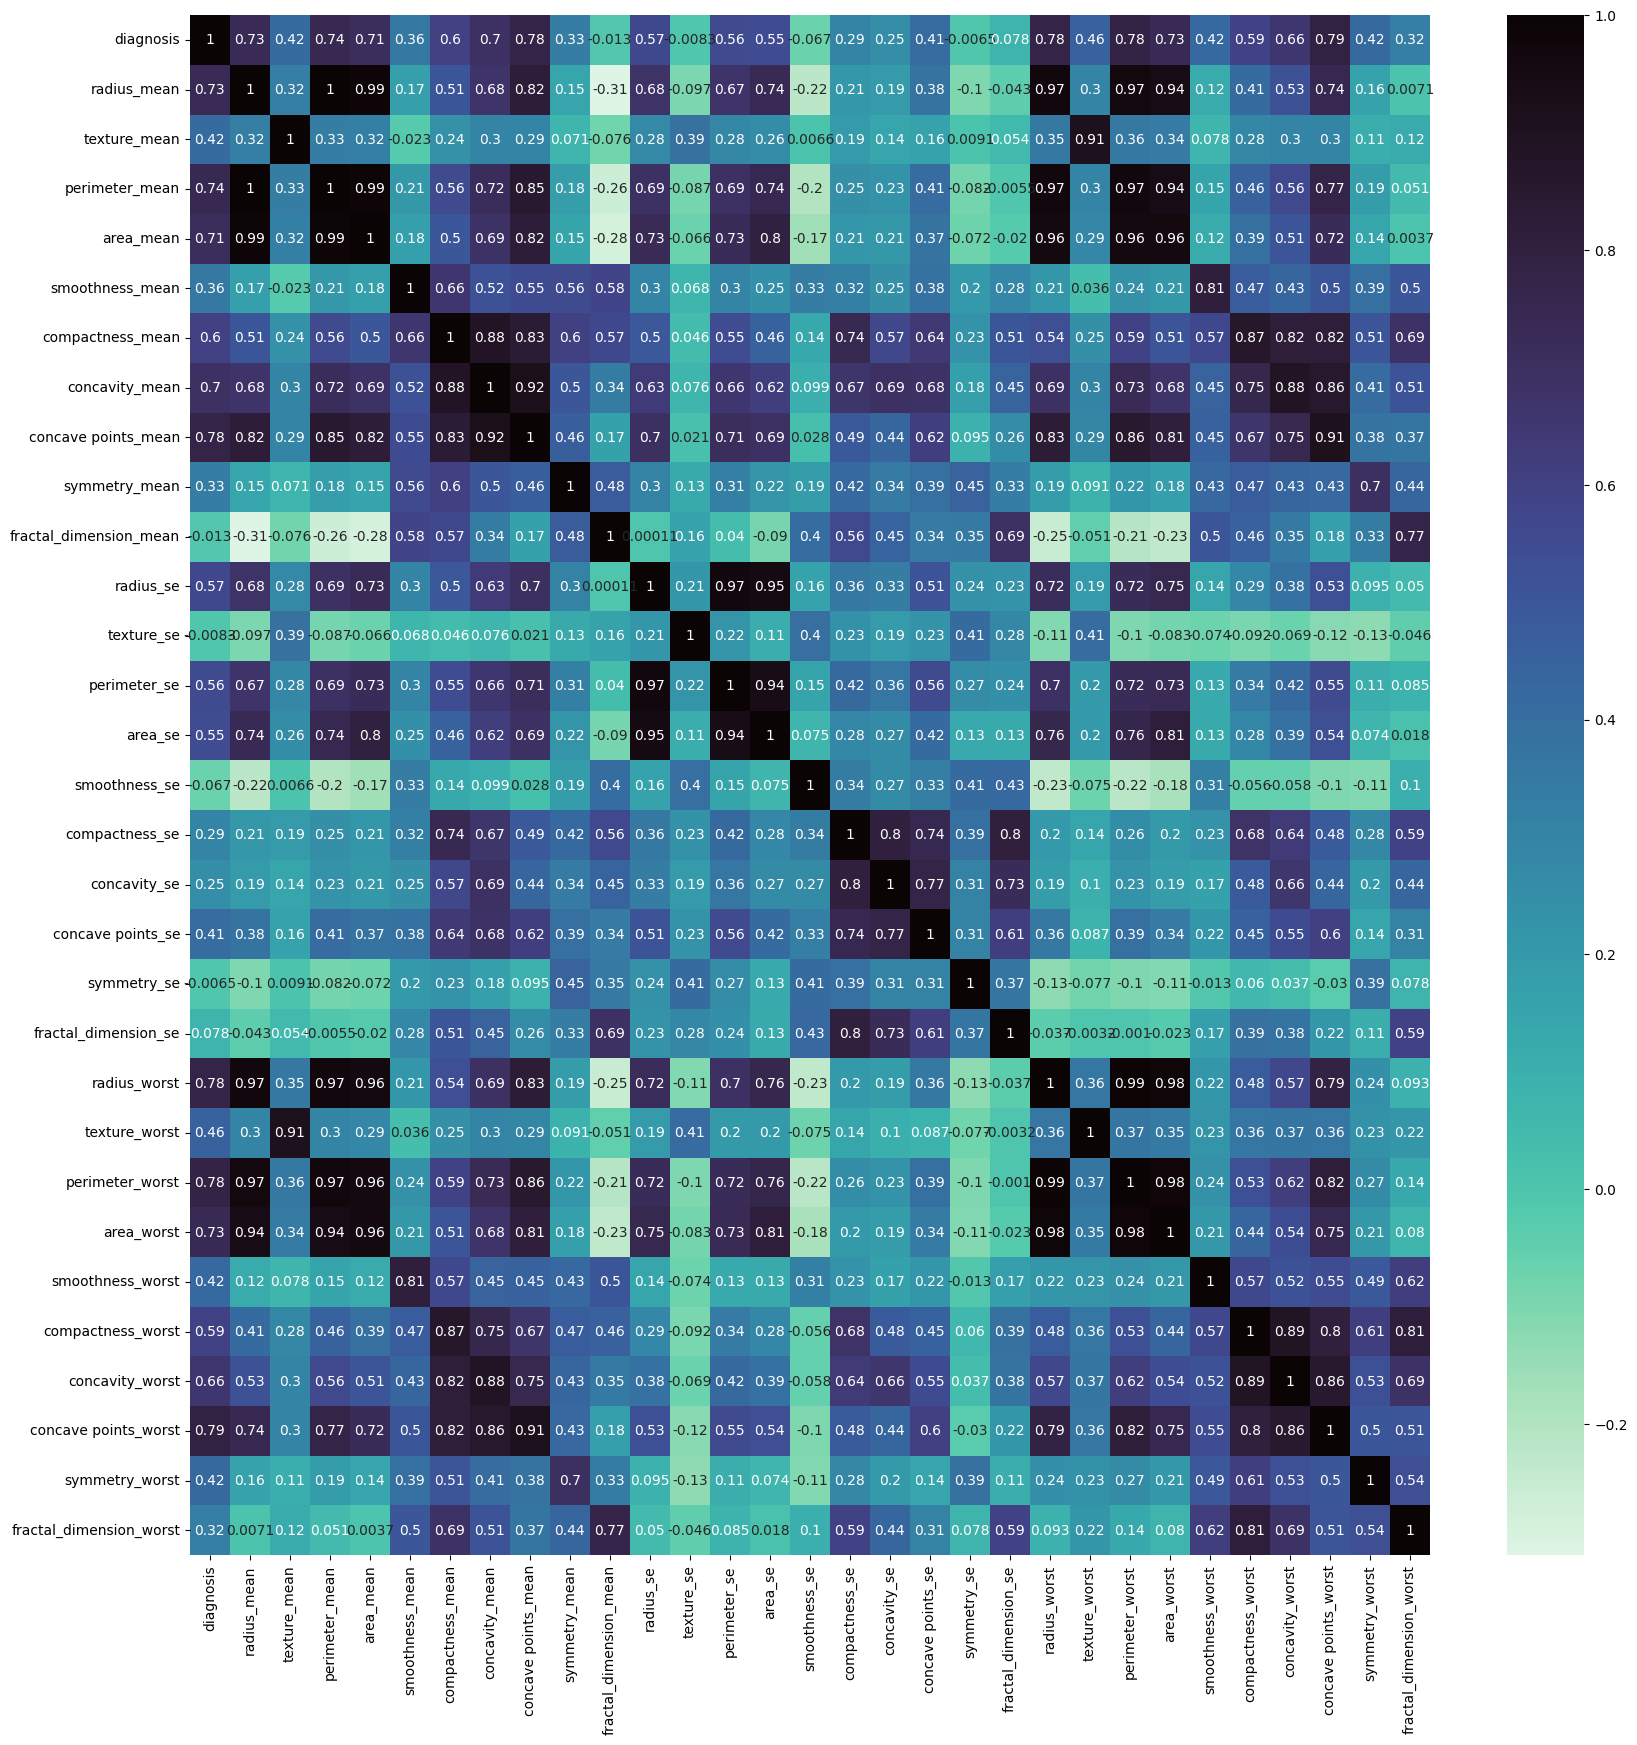

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

In [14]:
cor_target = abs(corr["diagnosis"])
relevant_features = cor_target[cor_target>0.2]
names = [index for index, value in relevant_features.items()]
names.remove('diagnosis')
X = df[names].values
y = df['diagnosis'].values

In [18]:
from mlfs.preprocessing import  train_test_split, standardize
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train = standardize(X_train)
X_test = standardize(X_test)

In [21]:
import pandas as pd
from mlfs.logistic_regression import LogisticRegression as CustomLogisticRegression
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from mlfs.metrics import (
    accuracy  as custom_accuracy,
    precision as custom_precision,
    recall    as custom_recall,
    f1_score  as custom_f1
)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# --- zakładam, że masz już X_train, X_test, y_train, y_test ---

# 1) Stworzenie i wytrenowanie modeli
custom_model = CustomLogisticRegression()
custom_model.fit(X_train, y_train, iterations= 100000,  plot_cost=True)

sk_model = SklearnLogisticRegression(max_iter=1000, solver='lbfgs')
sk_model.fit(X_train, y_train)

# 2) Predykcje
y_pred_custom = custom_model.predict(X_test)
y_pred_sk     = sk_model.predict(X_test)

# 3) Obliczenie metryk
acc_c  = custom_accuracy(y_test, y_pred_custom)
prec_c = custom_precision(y_test, y_pred_custom)
rec_c  = custom_recall(y_test, y_pred_custom)
f1_c   = custom_f1(y_test, y_pred_custom)

acc_s  = accuracy_score(y_test, y_pred_sk)
prec_s = precision_score(y_test, y_pred_sk)
rec_s  = recall_score(y_test, y_pred_sk)
f1_s   = f1_score(y_test, y_pred_sk)

# 4) Podsumowanie w DataFrame
df_results = pd.DataFrame({
    'model':     ['custom',       'sklearn'],
    'Accuracy':  [acc_c,          acc_s],
    'Precision': [prec_c,         prec_s],
    'Recall':    [rec_c,          rec_s],
    'F1-score':  [f1_c,           f1_s]
})

print(df_results)
# lub w notebooku: display(df_results)


Cost after iteration 0: 0.6931471605599454
Cost after iteration 10000: 0.24489130043411544
Cost after iteration 20000: 0.17990728559083677
Cost after iteration 30000: 0.15003517208612824
Cost after iteration 40000: 0.13217125502957042
Cost after iteration 50000: 0.12007968346149159
Cost after iteration 60000: 0.11125309005756337
Cost after iteration 70000: 0.1044685952279408
Cost after iteration 80000: 0.09905462758448096
Cost after iteration 90000: 0.09461011486912356


     model  Accuracy  Precision    Recall  F1-score
0   custom  0.955752   0.954545  0.933333  0.943820
1  sklearn  0.973451   0.977273  0.955556  0.966292


In [1]:
import time
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from mlfs.logistic_regression import LogisticRegression as CustomLogisticRegression
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression

def benchmark_logistic(n_samples_list, n_features=10, n_repeats=3):
    """
    Dla każdej liczby próbek w `n_samples_list`:
      - generuje dane klasyfikacyjne,
      - trenuje CustomLogisticRegression i mierzy czas fit() i predict(),
      - trenuje Sklearn LogisticRegression i mierzy czas fit() i predict().
    Zwraca DataFrame z kolumnami:
      ['n_samples', 'custom_fit', 'custom_predict', 'sklearn_fit', 'sklearn_predict']
    """
    results = []
    for n in n_samples_list:
        # 1) generacja danych binarnych
        X, y = make_classification(
            n_samples=n,
            n_features=n_features,
            n_informative=max(2, n_features // 2),
            n_redundant=0,
            random_state=42
        )
        
        # 2) custom logistic
        custom_times = {'fit': [], 'predict': []}
        for _ in range(n_repeats):
            model = CustomLogisticRegression()
            t0 = time.perf_counter()
            model.fit(X, y, iterations = 1000)
            t1 = time.perf_counter()
            model.predict(X[:10])
            t2 = time.perf_counter()
            custom_times['fit'].append(t1 - t0)
            custom_times['predict'].append(t2 - t1)
        
        # 3) sklearn logistic
        sklearn_times = {'fit': [], 'predict': []}
        for _ in range(n_repeats):
            model = SklearnLogisticRegression(max_iter=1000, solver='lbfgs')
            t0 = time.perf_counter()
            model.fit(X, y)
            t1 = time.perf_counter()
            model.predict(X[:10])
            t2 = time.perf_counter()
            sklearn_times['fit'].append(t1 - t0)
            sklearn_times['predict'].append(t2 - t1)
        
        # 4) agregacja średnich czasów
        results.append({
            'n_samples':       n,
            'custom_fit':      np.mean(custom_times['fit']),
            'custom_predict':  np.mean(custom_times['predict']),
            'sklearn_fit':     np.mean(sklearn_times['fit']),
            'sklearn_predict': np.mean(sklearn_times['predict']),
        })
        
    return pd.DataFrame(results)


In [2]:
ns = [100, 1_000, 10_000, 100_000]
df_times = benchmark_logistic(ns, n_features=20, n_repeats=5)


Cost after iteration 0: 0.6931471605599454
Cost after iteration 0: 0.6931471605599454
Cost after iteration 0: 0.6931471605599454
Cost after iteration 0: 0.6931471605599454
Cost after iteration 0: 0.6931471605599454
Cost after iteration 0: 0.6931471605599454
Cost after iteration 0: 0.6931471605599454
Cost after iteration 0: 0.6931471605599454
Cost after iteration 0: 0.6931471605599454
Cost after iteration 0: 0.6931471605599454
Cost after iteration 0: 0.6931471605599454
Cost after iteration 0: 0.6931471605599454
Cost after iteration 0: 0.6931471605599454
Cost after iteration 0: 0.6931471605599454
Cost after iteration 0: 0.6931471605599454
Cost after iteration 0: 0.6931471605599454
Cost after iteration 0: 0.6931471605599454
Cost after iteration 0: 0.6931471605599454


: 

In [ ]:
plot_benchmark(df_times,
               sample_col='n_samples',
               custom_fit_col='custom_fit',
               sklearn_fit_col='sklearn_fit',
               custom_pred_col='custom_predict',
               sklearn_pred_col='sklearn_predict')
